1. 데이터 셋 정보 확인
2. 결측 값 확인 -> 제거
3. 중복 확인
4. 문자열 -> 숫자(원-핫 인코딩)
5. 컬럼 삭제
6. 상관관계 확인
7. 시각화(막대, 히트맵, 박스, 히스토그램, 원형, 라인그래프, 산포그래프,..)

PassengerId	탑승자 데이터 일련번호 
Survived	생존여부(0: 사망, 1: 생존) = 
Pclass		티켓선실등급(1: 일등석, 2: 이등석, 3: 삼등석) 
Name		탑승자 이름 
Sex		탑승자 성별 
Age		탑승자 나이 
SibSp		같이 탑승한 형제, 자매 or 배우자의 인원 수 
Parch		같이 탑승한 부모님 or 어린이 인원 수 
Ticket		티켓번호 
Fare		요금 
Cabin		선실번호 
Embarked	중간정착항구(C : Cherbourg, Q : Queenstown, S = Sothampton) 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#  정보확인

In [3]:
train.info() 
#정보확인시 결측치 확인, 생존여부와 연관성 있는 컬럼 구분
#특성으로 사용할 수 있는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train['Survived'].value_counts()
#사망(0) :549명, 생존(1) :342명

0    549
1    342
Name: Survived, dtype: int64

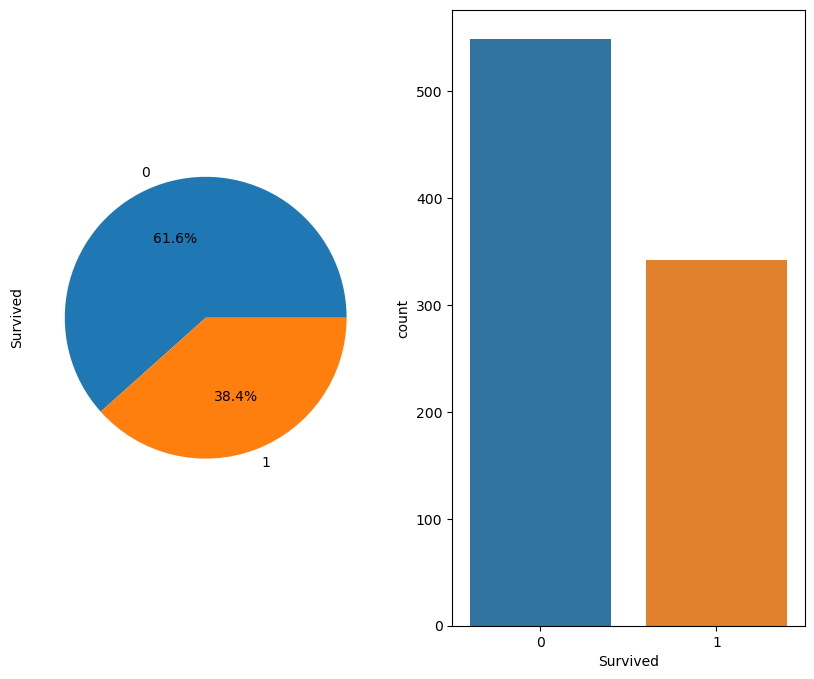

In [5]:
fig, axes = plt.subplots(1, 2, figsize = (10, ))

train['Survived'].value_counts().plot.pie(ax=axes[0], autopct = "%1.1f%%")

sns.countplot(data = train, x = 'Survived', ax=axes[1])

plt.show()

In [6]:
train['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [7]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

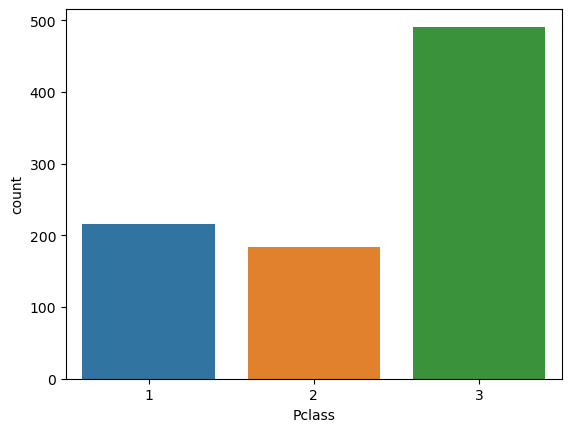

In [8]:
sns.countplot(data = train, x= 'Pclass')
plt.show()

In [9]:
#Pclass에 따른 Survived의 평균
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived', ascending =False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


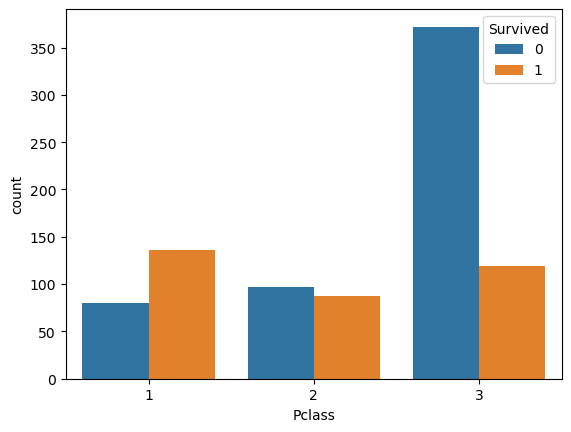

In [10]:
#Pclass에 따른 사망, 생존 여부 그래프
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')
plt.show()

[Text(0, 0.5, ''), Text(0.5, 1.0, '1-Pclass')]

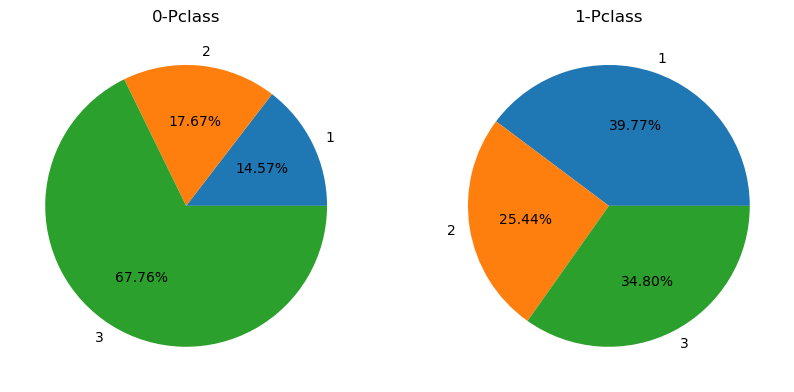

In [11]:
#pie() 사망-Pclass, 생존-Pclass 비율 확인
fig, axes = plt.subplots(1, 2, figsize = (10, 6))
train[train['Survived']==0]['Pclass'].value_counts().sort_index().plot.pie(ax = axes[0], autopct="%1.2f%%")
axes[0].set(ylabel = '', title ='0-Pclass')
train[train['Survived']==1]['Pclass'].value_counts().sort_index().plot.pie(ax = axes[1], autopct="%1.2f%%")
axes[1].set(ylabel = '', title ='1-Pclass')

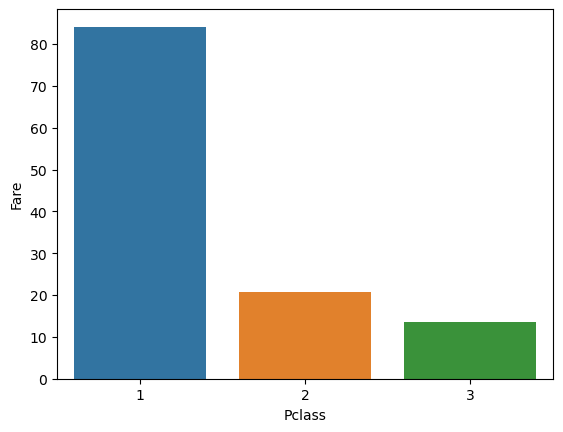

In [12]:
#Pclass와 가격의 차이 막대그래프
#1) Fare 컬럼 확인
train['Fare']
#2) Fare 컬럼의 유니크한 값들 확인 -> 금액이 다름을 확인함
train['Fare'].unique()
#3) 평균으로 구할지, 최대-최소의 차이로 구할지 생각(우린 평균으로 진행)
data1 = train.groupby('Pclass')['Fare'].mean().reset_index() #클래스별 평균가격확인
#4) Pclass별 평균 가격 차이 막대그래프로 확인
sns.barplot(data = data1, x = 'Pclass', y = 'Fare')
plt.show()

In [13]:
train['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [14]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


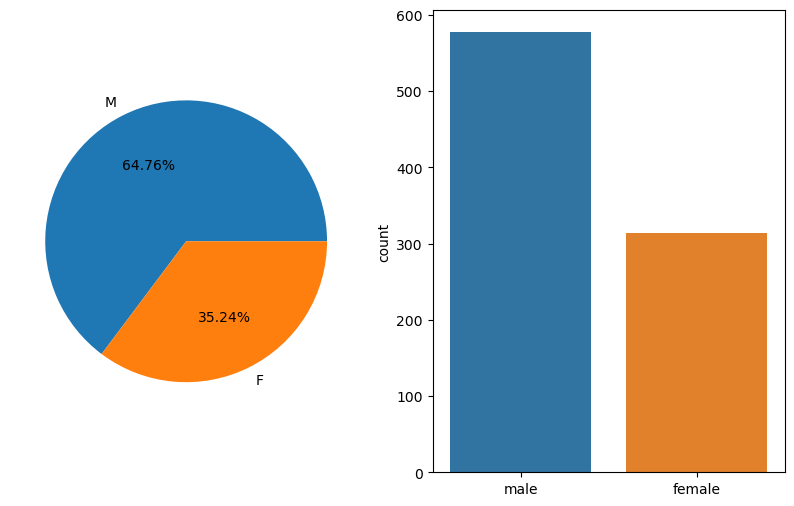

male      577
female    314
Name: Sex, dtype: int64

In [15]:
#성별에 따른 원형그래프, 막대그래프 그리기

fig, axes = plt.subplots(1, 2, figsize = (10, 6))
labels = ['M','F']

#남성, 여성 탑승자 비율 원형그래프
train['Sex'].value_counts().plot.pie(ax=axes[0], autopct = "%1.2f%%", labels=labels)
axes[0].set(ylabel = '')

#남성, 여성 탑승자 인원 막대그래프
sns.countplot(data = train, x = 'Sex', ax=axes[1])
axes[1].set(xlabel='')

plt.show()

train['Sex'].value_counts()

In [16]:
#여성 탑승자보다 남성 탑승자 더 많다
#성별과 생존 여부 확인
train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


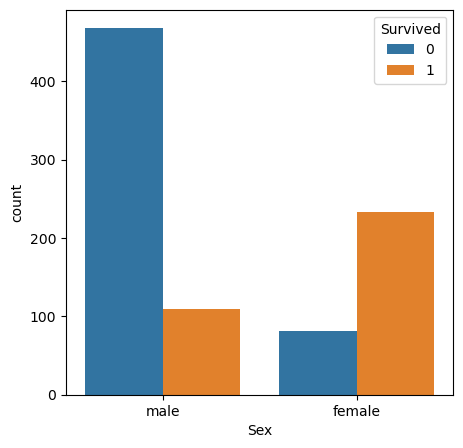

In [17]:
#남성, 여성의 생존/사망 여부 확인
fig, axes = plt.subplots(figsize=(5, 5))

sns.countplot(data=train, x ='Sex', hue = 'Survived', ax = axes)
plt.show()

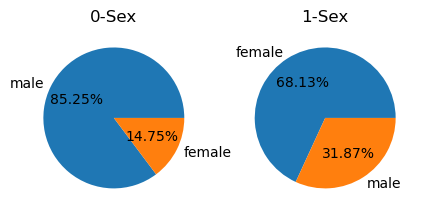

In [18]:
#성별의 생존/사망 비율 확인
fig, axes = plt.subplots(1, 2, figsize = (5, 5))

#Survived 0인 데이터 이용한 pie()
train[train['Survived']==0]['Sex'].value_counts().plot.pie(ax=axes[0], autopct="%1.2f%%")
axes[0].set(ylabel='', title = '0-Sex')

#Survived 1인 데이터 이용한 pie()
train[train['Survived']==1]['Sex'].value_counts().plot.pie(ax=axes[1], autopct="%1.2f%%")
axes[1].set(ylabel='', title='1-Sex')

plt.show()

#남자가 더 많이 사망했다 => 여자를 더 구하려고했다

C:\Users\JOOYONKJ\AppData\Local\Temp\ipykernel_3176\3506540838.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'], bins=30, ax = axes)


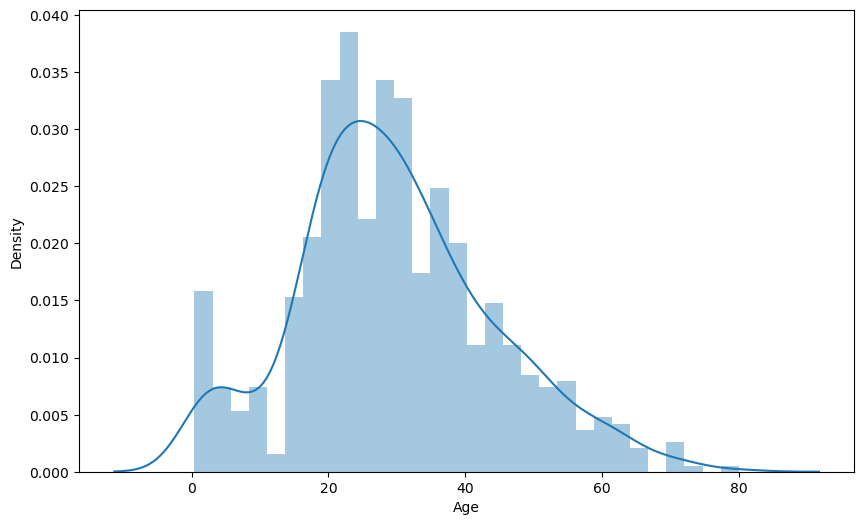

In [19]:
#나이 확인 => 결측값이 있음
#수치형으로 데이터가 존재함 => 분포 그래프를 이용함
fig, axes = plt.subplots(figsize = (10, 6))

sns.distplot(train['Age'], bins=30, ax = axes)
plt.show()

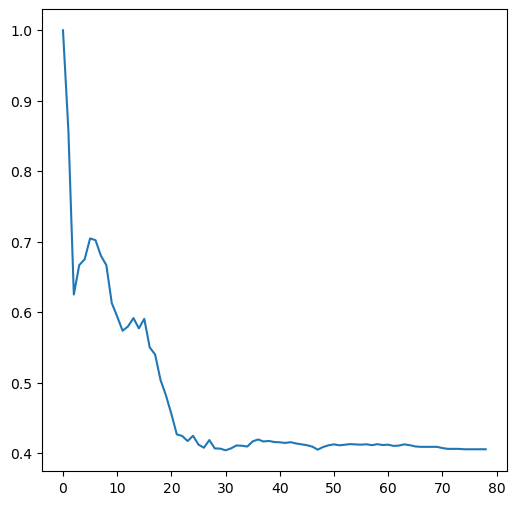

In [20]:
#Age와 Survived의 관계 확인
#나이에 따른 생존 인원수를 전체 해당 나이로 나눈다

#생존율을 입력받을 리스트 생성
a_s = []

for i in range(1, 80):
    a_s.append(train[train['Age'] < i]['Survived'].sum() 
               / len(train[train['Age'] <i]['Survived']) )


# print(a_s)

#생존율 그래프 => 선그래프
plt.figure(figsize = (6, 6))
plt.plot(a_s)
plt.show()

In [21]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


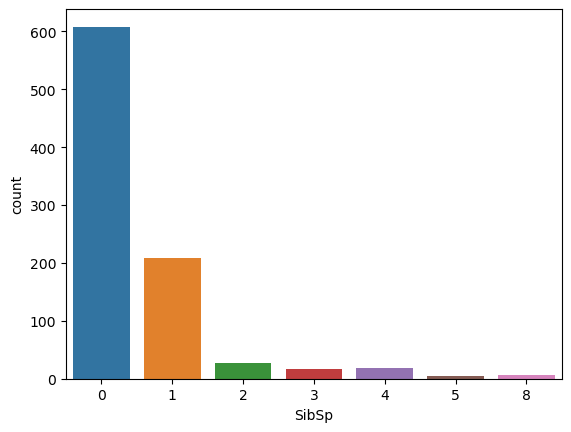

In [22]:
#SibSp 형제 자매, 배우자의 총합, 본인은 포함한 수 x
sns.countplot(data = train, x = 'SibSp')
plt.show()

In [23]:
#혼자 탄사람과 가족과 같이 탄사람의 생존 여부(평균)
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [24]:
#Parch 함께 탑승한 부모, 자녀수의 총합, 본인 포함 x
train[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


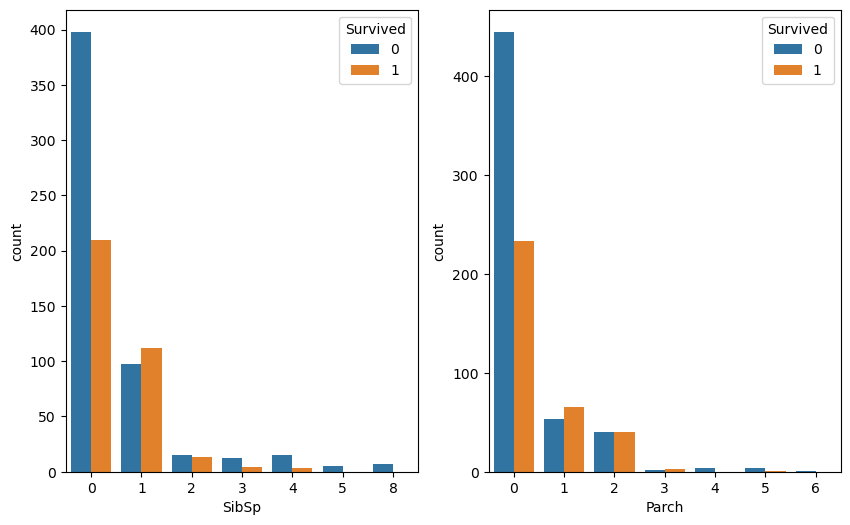

In [25]:
fig, axes = plt.subplots(1, 2, figsize = (10, 6))
sns.countplot(data =train, x = 'SibSp', hue = 'Survived', ax=axes[0])

sns.countplot(data = train, x = 'Parch', hue = 'Survived', ax=axes[1])
plt.show()

#SibSp, Parch는 하나의 데이터로 합쳐서 사용가능할 것 같다
#혼자 탑승한 사람의 생존율이 낮다

In [26]:
#Embarked => 항구와 생존유무

train['Embarked'].value_counts()

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


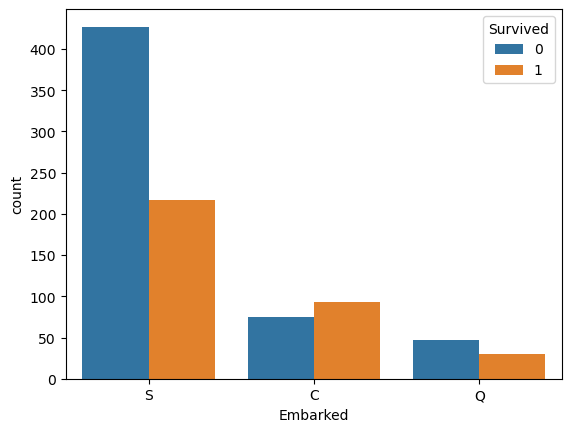

In [27]:
sns.countplot(data=train, x='Embarked', hue='Survived')
plt.show()

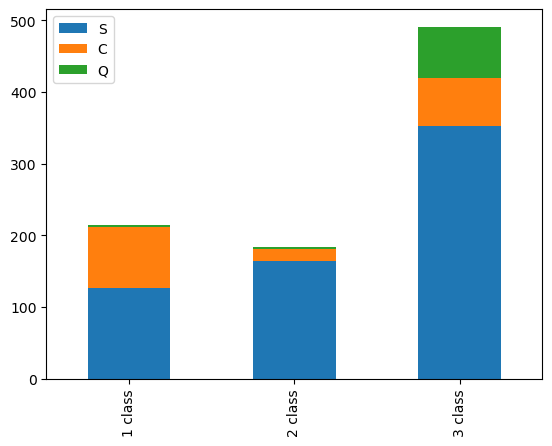

In [28]:
#Pcalss 별 데이터 나누기
pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()

#df로 변환 후 그래프
df = pd.DataFrame([pclass1, pclass2, pclass3])
df.index = ['1 class', '2 class', '3 class']
df.plot(kind = 'bar', stacked=True)

plt.show()

In [29]:
train = train.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis = 1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [30]:
train['Age'].fillna(train['Age'].mean(), inplace = True)
train['Embarked'].fillna('N', inplace = True)

train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [31]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [32]:
train = pd.get_dummies(train)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_N,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0,0


In [33]:
from sklearn.model_selection import train_test_split

X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
X_train.shape

(712, 11)

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [36]:
accuracy_scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')

In [37]:
print(accuracy_scores.mean())

0.7878601468834348
